**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [163]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
#import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import pylab as pl;
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [164]:
firearms= pd.read_csv(os.getenv("PUIDATA") + "/" + 'World firearms murders and ownership - Sheet 1.csv')
pop= pd.read_csv(os.getenv("PUIDATA") + "/" + 'API_SP.POP.TOTL_DS2_en_csv_v2.csv', skiprows=4)
shooting = pd.read_csv(os.getenv("PUIDATA") + "/" + 'data-pvLFI.csv')
gdp = pd.read_csv(os.getenv("PUIDATA") + "/" + 'API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', skiprows=4)

In [165]:
gdp = gdp[['Country Name','2012']]
gdp.columns = ['Country','gdp']
pop = pop[['Country Name', '2012']]
pop.columns = ['Country','pop']

In [166]:
df = pop.merge(shooting, right_on="Country", left_on="Country")

In [167]:
df = df.merge(gdp, right_on = "Country", left_on ="Country")

In [168]:
firearms.head(5)

Country/Territory ISO code               Source  % of homicides by firearm  \
0           Albania       AL                  CTS                       65.9   
1           Algeria       DZ                  CTS                        4.8   
2            Angola       AO                  NaN                        NaN   
3          Anguilla       AI              WHO-MDB                       24.0   
4         Argentina       AR  Ministry of Justice                       52.0   

   Number of homicides by firearm  Homicide by firearm rate per 100,000 pop  \
0                            56.0                                      1.76   
1                            20.0                                      0.06   
2                             NaN                                       NaN   
3                             1.0                                      7.14   
4                          1198.0                                      3.02   

   Rank by rate of ownership  Average firearms per 100 people  \
0                       70.0                              8.6   
1                       78.0                              7.6   
2                       34.0                             17.3   
3                        NaN                              NaN   
4                       62.0                             10.2   

   Average total all civilian firearms  
0                             270000.0  
1                            1900000.0  
2                            2800000.0  
3                                  NaN  
4                            3950000.0

In [169]:
df = df.merge(firearms, right_on ="Country/Territory", left_on = "Country")
df.head(2)

Country         pop  Guns/100 inhabitants  Number of mass shootings  \
0  Australia  22728254.0                  15.0                         4   
1    Austria   8429991.0                  30.4                         1   

            gdp Country/Territory ISO code Source  % of homicides by firearm  \
0  1.538194e+12         Australia       AU    NSO                       11.5   
1  4.074516e+11           Austria       AT    CTS                       29.5   

   Number of homicides by firearm  Homicide by firearm rate per 100,000 pop  \
0                            30.0                                      0.14   
1                            18.0                                      0.22   

   Rank by rate of ownership  Average firearms per 100 people  \
0                       42.0                             15.0   
1                       14.0                             30.4   

   Average total all civilian firearms  
0                            3050000.0  
1                            2500000.0

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


In [170]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting over the past 30 years")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")




Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [171]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(122)
df['gdppp'] = df['gdp']/df['pop']
df['shootingspp'] = df["Number of mass shootings"] / df['pop'] * 1000
scatter1 = ax.scatter(df['gdppp'], df['shootingspp'])
ax.errorbar(df['gdppp'], df['shootingspp'], 
            yerr = np.sqrt((df['shootingspp']) * 1.0), fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Number of mass shooting per 1000 people over 30 years")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n")

Number of mass shooting vs GDP, errors represent Poisson statistics.



## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

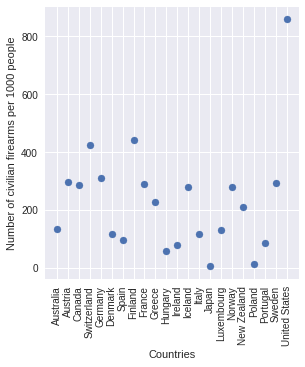

In [172]:

fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(122)
#plotting average number of civilian fire arms per person without errors
df['firearmspp'] = df['Average total all civilian firearms']/df['pop'] * 1e3
#ax.hist(df['Average total all civilian firearms']/df['pop'] *1e3)
scatter = ax.scatter(df.index, df['firearmspp'])
ax.set_xlabel('Countries')
ax.set_ylabel("Number of civilian firearms per 1000 people")
plt.xticks(df.index, df.Country);
plt.xticks(rotation=90);

In [173]:

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.errorbar(df.index, df['firearmspp'], 
            yerr = np.sqrt(df['firearmspp']), fmt = '.')
#ax.hist(df['Average total all civilian firearms']/df['pop'] *1e3)
scatter1 = ax1.scatter(df.index,df['firearmspp'])
ax.set_xlabel('Countries')
ax.set_ylabel("Number of civilian firearms per 1000 people")
plt.xticks(df.index, df.Country);
plt.xticks(rotation=90);

## United States looks like an outlier

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

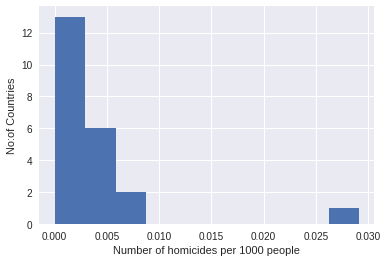

In [174]:
fig, ax = plt.subplots()
#plotting average number of civilian fire arms per person without errors
df['homicidespp'] = df['Number of homicides by firearm']/df['pop'] * 1e3
ax.hist(df['homicidespp'])
#scatter = ax.scatter(df.index, df['firearmspp'])
ax.set_xlabel('Number of homicides per 1000 people')
ax.set_ylabel("No:of Countries")
#plt.xticks(df.index, df.Country);
#plt.xticks(rotation=90);

In [175]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(122)
scatter1 = ax.scatter(df['gdppp'], df['homicidespp'])
ax.errorbar(df['gdppp'], df['homicidespp'], 
            yerr = np.sqrt((df['homicidespp']) * 1.0), fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Number of homicides per 1000 people")
pl.show()
print ("Number of homicides vs GDP, " + 
       "errors represent Poisson statistics.\n")

Number of homicides vs GDP, errors represent Poisson statistics.



## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


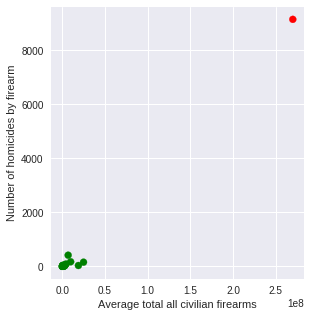

Number of homicides vs Average total all civilian firearms


In [178]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(122)
color= ['red' if df.Country[i] == 'United States' else 'green' for i in range(len(df))]
scatter1 = ax.scatter(df['Average total all civilian firearms'], df['Number of homicides by firearm'], color = color)
#ax.errorbar(df['Average total all civilian firearms'], df['Number of homicides by firearm'], 
#            yerr = np.sqrt((df['Number of homicides by firearm']) * 1.0), fmt = '.')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
pl.show()
print ("Number of homicides vs Average total all civilian firearms")

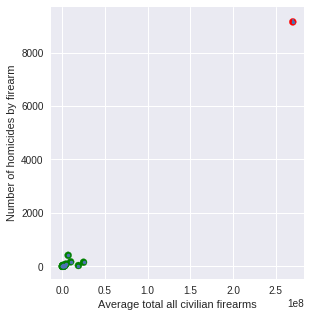

Number of homicides vs Average total all civilian firearms, errors represent Poisson statistics.



In [179]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(122)
color= ['red' if df.Country[i] == 'United States' else 'green' for i in range(len(df))]
scatter1 = ax.scatter(df['Average total all civilian firearms'], df['Number of homicides by firearm'], color = color)
ax.errorbar(df['Average total all civilian firearms'], df['Number of homicides by firearm'], 
            yerr = np.sqrt((df['Number of homicides by firearm']) * 1.0), fmt = '.')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
pl.show()
print ("Number of homicides vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [198]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(122)
color= ['red' if df.Country[i] == 'United States' else 'green' for i in range(len(df))]
scatter1 = ax.scatter(df['Average total all civilian firearms']/1e6, df['Number of mass shootings'], color = color)
#ax.errorbar(df['Average total all civilian firearms'], df['Number of homicides by firearm'], 
#            yerr = np.sqrt((df['Number of homicides by firearm']) * 1.0), fmt = '.')
ax.set_xlabel("Average total all civilian firearms(in millions)")
ax.set_ylabel("Number of mass shootings")
pl.show()
print ("Number of mass shootings vs Average total all civilian firearms")

Number of mass shootings vs Average total all civilian firearms


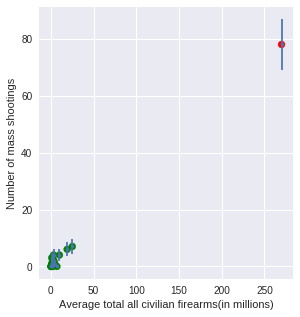

Number of mass shootings vs Average total all civilian firearms


In [200]:
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(122)
color= ['red' if df.Country[i] == 'United States' else 'green' for i in range(len(df))]
scatter1 = ax.scatter(df['Average total all civilian firearms']/1e6, df['Number of mass shootings'], color = color)
ax.errorbar(df['Average total all civilian firearms']/1e6, df['Number of mass shootings'], 
            yerr = np.sqrt((df['Number of mass shootings']) * 1.0), fmt = '.')
ax.set_xlabel("Average total all civilian firearms(in millions)")
ax.set_ylabel("Number of mass shootings")
pl.show()
print ("Number of mass shootings vs Average total all civilian firearms")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [249]:
lm_OLS = smf.ols(formula='shootingspp ~ firearmspp', data = df).fit()

In [246]:
df['shootingspp'] = df["Number of mass shootings"] / df['pop'] * 1e6
df['firearmspp'] = df['Average total all civilian firearms']/df['pop'] 

In [247]:
print(mean(df.shootingspp))
print(mean(df.firearmspp))

0.121021254397
0.228950085729


In [248]:

yerr = np.sqrt((df['shootingspp']) * 1.0)
weights = [1 if yerr[i] == 0 else (1/yerr[i]) for i in range(len(df))]
lm_WLS = smf.WLS(endog=df['shootingspp'], exog=df['firearmspp'], weights=weights).fit()

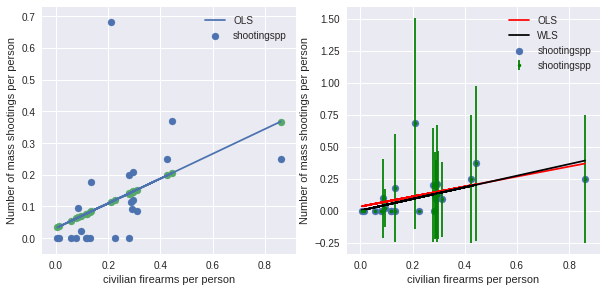

In [254]:

fig = pl.figure(figsize=(10, 10))

y_OLS = lm_OLS.fittedvalues
y_WLS = lm_WLS.fittedvalues
y = df['shootingspp']

ax1 = fig.add_subplot(221)
ax1.scatter(df['firearmspp'], df['shootingspp'])
ax1.plot(df['firearmspp'], y_OLS, label = 'OLS')
ax1.scatter(df['firearmspp'],y_OLS)
ax1.set_xlabel('civilian firearms per person')
ax1.set_ylabel('Number of mass shootings per person')
ax1.legend()

ax2 = fig.add_subplot(222)
ax2.scatter(df['firearmspp'], df['shootingspp'])
ax2.plot(df['firearmspp'], y_OLS, label = 'OLS', color='red')
ax2.plot(df['firearmspp'],y_WLS, label = 'WLS', color='black')
ax2.errorbar(df['firearmspp'], df['shootingspp'], 
            yerr = np.sqrt(df['shootingspp']), fmt = 'g.')
ax2.set_xlabel('civilian firearms per person')
ax2.set_ylabel('Number of mass shootings per person')
ax2.legend()
plt.show()


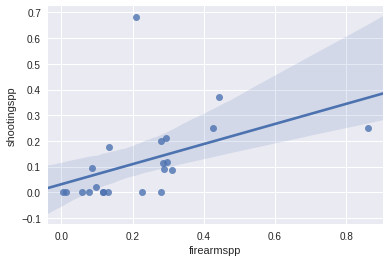

In [255]:
sns.regplot(x="firearmspp", y="shootingspp", data=df)

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

In [269]:
lm_OLS.summary()
coef_intercept = 0.0315
std_err = 0.051
t_stat = 2.086 #looked up from tables
ci1= coef_intercept + (std_err) * t_stat
ci2= coef_intercept - (std_err) * t_stat
print(ci2,ci1)
lm_OLS.summary()

(-0.07488599999999998, 0.13788599999999998)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        23:24:56   Log-Likelihood:                 11.424
No. Observations:                  22   AIC:                            -18.85
Df Residuals:                      20   BIC:                            -16.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0315      0.051      0.612      0.548        -0.076     0.139
firearmspp     0.3911      0.175      2.230      0.037         0.025     0.757
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [275]:
pylab.fill_between(df.firearmspp, y_OLS - ci1, y_OLS + ci2, alpha=0.5)
pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



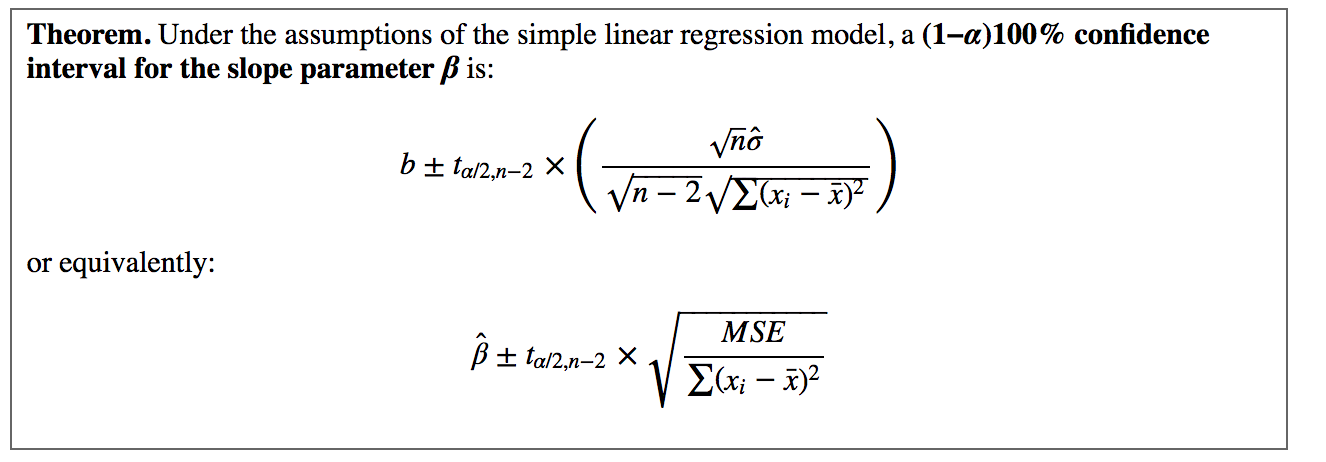

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

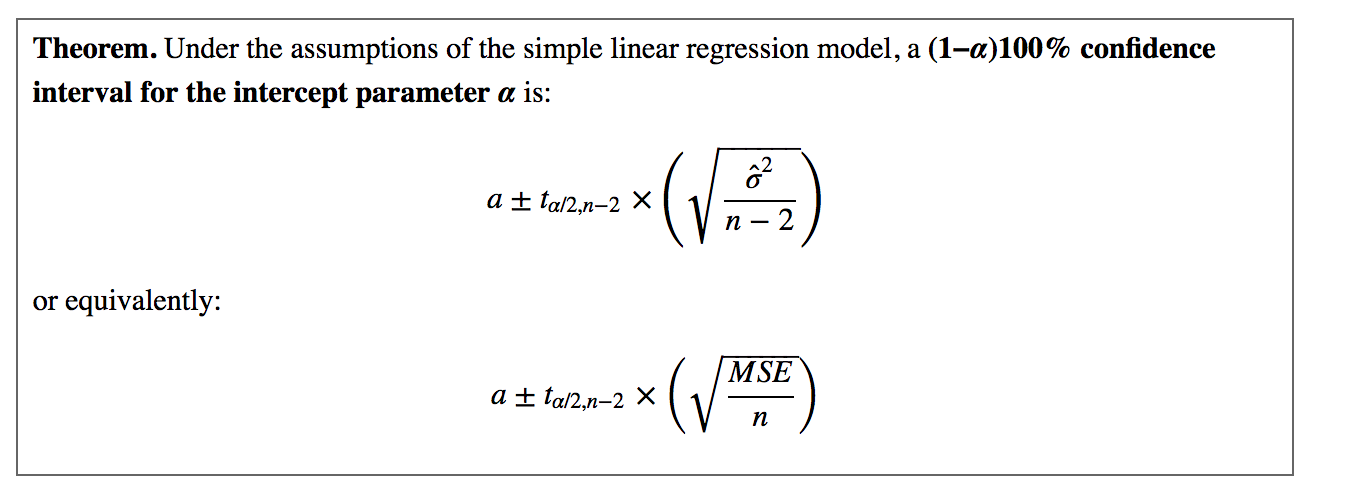

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

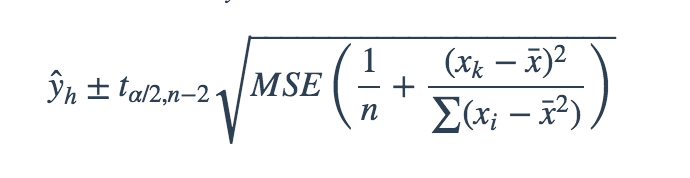

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

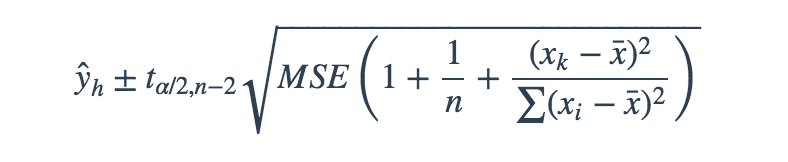

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

In [258]:
sns.regplot(x="firearmspp", y="shootingspp", data=df)

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

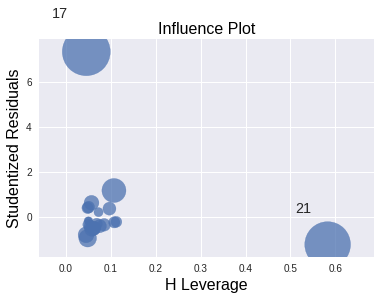

In [257]:
sm.graphics.influence_plot(lm_OLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings